In [1]:
import numpy as np

### Research question
Is d-separation valid for intrinsic SCMs? That is, cyclic SCMs satisfiying $\rho(|A|)<1$, where $A$ is the Lipschitz matrix of the structural functions $F$?

I need methods for:
- sampling (enumerating?) from all possible cyclic graphs $G$ of size n
- sampling SCMs which fit $G$ (ideally including a mix of intrinsic and not)
- determining if an SCM $M$ is intrinsic
- constructing the graph $G$, given $M$ (unnecessary?)
- finding all d-separation statements from a cyclic graph $G$
- sampling a dataset from the observational distribution $P(V)$ of $M$
- checking whether an independence holds in the dataset from $P(V)$

Relevant resources:
- Constraint-based Causal Discovery for Non-Linear Structural Causal Models with Cycles and Latent Confounders, Mooji et. al.
- PYCID

In [2]:
import numpy as np
import helper_functions as hf
from matplotlib import pyplot as plt
import time
import networkx as nx
from tqdm import tqdm
from itertools import combinations

In [3]:
n = 4

collection = hf.all_graphs_fast(n)
count_with_any_d_sep = 0
high_lipschitz_pvals = []

high_got_nanned = 0

num_p_vals = 10

for Adj in tqdm(collection):
    d_seps = list(hf.all_d_separations(Adj))
    if len(d_seps):
        count_with_any_d_sep += 1
        
        # Test high-lipschitz
        structure = hf.sample_neural(Adj=Adj,intrinsic=None)
        for iteration in range(num_p_vals):
            pvals, high_got_nanned = hf.check_d_separation(structure,d_seps,high_got_nanned)
            high_lipschitz_pvals.append(pvals)

100%|██████████| 216/216 [7:42:18<00:00, 128.42s/it]  


In [4]:
print("Number of graphs:",len(collection))
print("Number with d-separations:",count_with_any_d_sep)
print("high_lipschitz, didn't converge:",high_got_nanned)

Number of graphs: 216
Number with d-separations: 107
high_lipschitz, didn't converge: 0


In [5]:
def extract_data(all_pvals,num_p_vals):
    data = dict()
    i = -1
    for Adj in collection:
        d_seps = list(hf.all_d_separations(Adj))
        if len(d_seps):
            i += 1
            assert i >= 0
            assert i <= 107
            relevant_p_vals = all_pvals[i*num_p_vals:(i+1)*num_p_vals]
            assert len(relevant_p_vals) == num_p_vals

            Adj_d_seps = dict()
            for p_vals in relevant_p_vals: # each item here is pvals-output of check_d_separation()
                for j, candidate in enumerate(d_seps):
                    assert p_vals[j][0] == candidate
                    pval = p_vals[j][1]
                    if candidate in Adj_d_seps.keys():
                        Adj_d_seps[candidate].append(pval)
                    else:
                        Adj_d_seps[candidate] = [pval,]

            Adj_data = [Adj,Adj_d_seps]
            data[i] = Adj_data
    return data

In [6]:
high_lipschitz_data = extract_data(high_lipschitz_pvals,num_p_vals)

In [7]:
import pickle

pickle.dump( high_lipschitz_data, open( "high_lipschitz_data.p", "wb" ) )

In [8]:
def plot(candidate,high_pvals):
    X,Y,Z = candidate
    plt.rcParams.update({'font.size': 22})

    plt.figure(figsize=(3,1))
    plt.hist(high_pvals,label="high",alpha=0.5,color='r',bins=20)
    plt.axis([0, 1, 0, 5])
    plt.xlabel("P-value (fcit)")
    plt.ylabel("freq")
    plt.title("$({} \perp \!\!\! \perp {} | {})$ ?".format(X,Y,Z))
    plt.show()

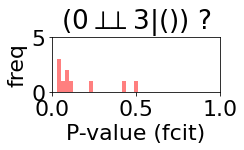

0.1645872223237538
[0.040732975208188645, 0.09554782842646427, 0.029850455881754275, 0.043881097618602254, 0.5104012658853971, 0.07114731336374584, 0.09117606819373443, 0.10556286650956138, 0.431963952318153, 0.22560839983193665]


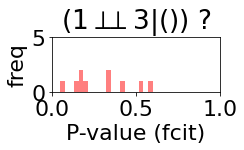

0.2932515225108277
[0.18535222054492437, 0.0470315559543783, 0.600022044843056, 0.1561685908855933, 0.33195125958858807, 0.17645588972174728, 0.41150801308542817, 0.3405249096269406, 0.165783257674722, 0.5177174831828987]


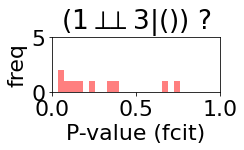

0.28410167522936847
[0.035163661763207676, 0.07926477356044348, 0.151080068444834, 0.055467152623661, 0.7644652748083263, 0.33843258688956945, 0.6675734259819357, 0.13821826737809337, 0.22983070036605274, 0.3815208404775612]


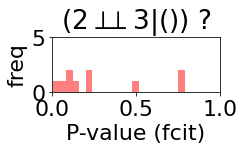

0.2930839858986479
[0.0782995766666252, 0.003920842286793111, 0.11267421093058647, 0.5055098095172779, 0.7911473264046999, 0.09895421447137101, 0.13669966912125756, 0.771307559947254, 0.21163365541220625, 0.2206929942284077]


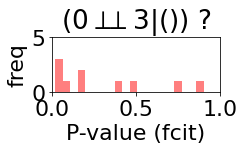

0.299844833319666
[0.4034184272845681, 0.1549985110760252, 0.028066880199777936, 0.02692245573557479, 0.734317091528126, 0.504654901506074, 0.06439273069860725, 0.15611415603478793, 0.9063448105503211, 0.019218368582797088]


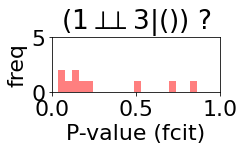

0.2975373904928792
[0.0372965000502816, 0.5112557139902691, 0.18607942972513014, 0.14929000324784872, 0.7329828791422435, 0.8620133800438363, 0.08800090628363184, 0.05371649980084296, 0.14003189939927854, 0.21470669324542968]


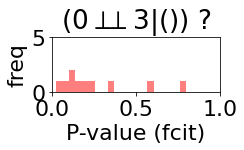

0.2707128201968327
[0.20686298766627692, 0.3615127209999156, 0.17600299839321878, 0.5672400236856311, 0.8013070693411452, 0.08257009154042164, 0.0207426699472091, 0.1279722197554081, 0.13558546373741023, 0.2273319569016901]


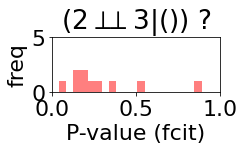

0.29672389937054366
[0.8924900379347667, 0.18561397662983325, 0.18373643674683077, 0.16878821867201266, 0.041387258315254805, 0.2553389829048183, 0.23251627702812644, 0.35442172436668845, 0.13460847524026187, 0.5183376058668437]


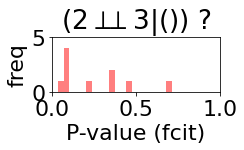

0.24951220096337595
[0.3556442935906893, 0.23384544907284277, 0.0346995999003408, 0.08386627424610757, 0.08194208664904706, 0.08315496190106868, 0.08807064092543364, 0.7141329018164517, 0.4584869907769654, 0.3612788107548127]


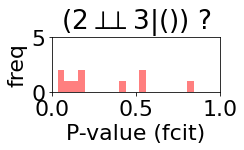

0.29858885241632344
[0.16511815238206623, 0.8448148555129187, 0.1213656114122927, 0.09424458096007114, 0.03266348451231638, 0.0590247358410957, 0.5409084879042357, 0.17478032857091133, 0.4160897908278566, 0.5368784962394698]


In [12]:
for key, (Adj,Adj_d_seps) in high_lipschitz_data.items():    
    for candidate, high_pvals in Adj_d_seps.items():
        if np.mean(high_pvals) <= .3: # here. need to incorperate product checks.
            plot(candidate,high_pvals)
            print(np.mean(high_pvals))
            print(high_pvals)
            time.sleep(1)
        try:
            assert np.mean(high_pvals) > .1
        except AssertionError as E:
            print(E)
            print("something happened")
            plot(candidate,high_pvals)
            time.sleep(1)